In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Replace 'data.csv' with your actual file path
data = pd.read_csv('/content/drive/MyDrive/Ocean Waves/Coastal Data  Waves.csv')
data_cleaned = data.dropna()
# Replace 'cleaned_data.csv' with your desired file name
data_cleaned.to_csv('/content/drive/MyDrive/Ocean Waves/Coastal Data  Waves.csv', index=False)



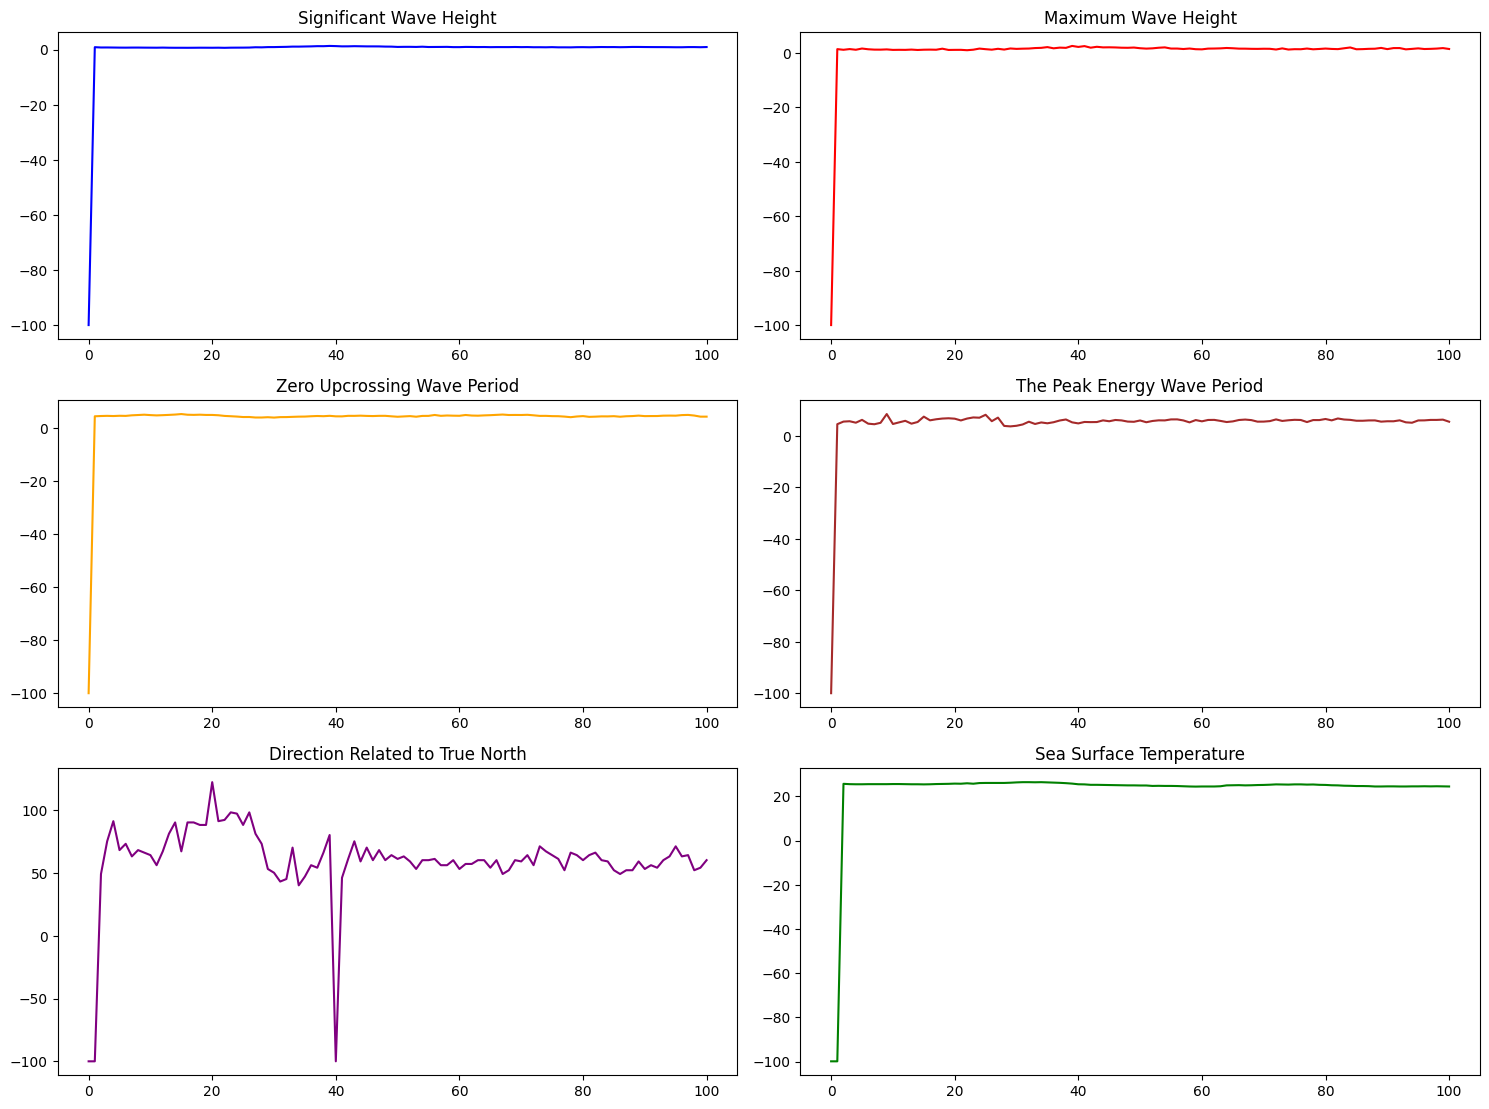

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data or create your DataFrame
data = pd.read_csv('/content/drive/MyDrive/Ocean Waves/Coastal Data  Waves.csv')

# Assuming you want to plot the first 100 rows
df_graph = data.loc[0:100]

plt.figure(figsize=(15, 22))

plt.subplot(6, 2, 1)
plt.plot(df_graph['Hs'], color='blue')
plt.title('Significant Wave Height')

plt.subplot(6, 2, 2)
plt.plot(df_graph['Hmax'], color='red')
plt.title('Maximum Wave Height')

plt.subplot(6, 2, 3)
plt.plot(df_graph['Tz'], color='orange')
plt.title('Zero Upcrossing Wave Period')

plt.subplot(6, 2, 4)
plt.plot(df_graph['Tp'], color='brown')
plt.title('The Peak Energy Wave Period')

plt.subplot(6, 2, 5)
plt.plot(df_graph['Peak Direction'], color='purple')
plt.title('Direction Related to True North')

plt.subplot(6, 2, 6)
plt.plot(df_graph['SST'], color='green')
plt.title('Sea Surface Temperature')

plt.tight_layout()
plt.show()


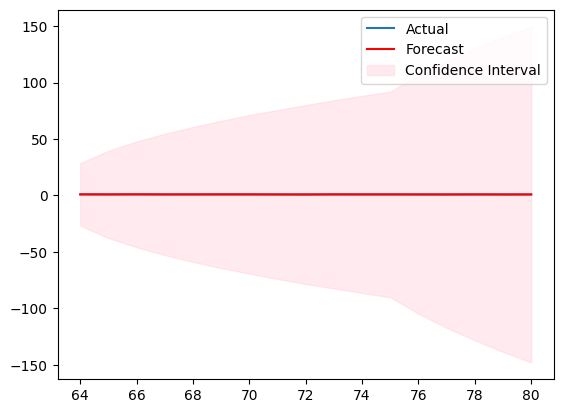

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load your data or create your DataFrame
# Replace 'data.csv' with your actual file path
data = pd.read_csv('/content/drive/MyDrive/Ocean Waves/Coastal Data  Waves.csv')

# Assuming you want to use the first 80 rows for modeling
df_model = data.loc[0:80]

# Select the 'Hs' column for forecasting
y = df_model['Hs']

# Split the data into training and testing sets
train_size = int(0.8 * len(y))
train_data, test_data = y[:train_size], y[train_size:]

# Fit a SARIMAX model
order = (1, 1, 1)  # Replace with appropriate order
seasonal_order = (1, 1, 1, 12)  # Replace with appropriate seasonal order
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Forecast future values
forecast_steps = len(test_data)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecasted_values = forecast.predicted_mean
confidence_interval = forecast.conf_int()

# Plot the forecasted values
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, forecasted_values, label='Forecast', color='red')
plt.fill_between(test_data.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Load your data or create your DataFrame
# Replace 'data.csv' with your actual file path
data = pd.read_csv('/content/drive/MyDrive/Ocean Waves/Coastal Data  Waves.csv')

# Assuming you want to use the first 80 rows for modeling
df_model = data.loc[0:80]

# Select the 'Hs' column for modeling
df_selected = df_model[['Hs']]

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_selected)

# Split the data into training and testing sets
train_size = int(0.8 * len(scaled_data))
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# ARIMA model
history_arima = [x for x in train_data]
predictions_arima = []

for t in range(len(test_data)):
    model_arima = ARIMA(history_arima, order=(5, 1, 0))
    model_fit_arima = model_arima.fit()
    output_arima = model_fit_arima.forecast()
    yhat_arima = output_arima[0]
    predictions_arima.append(yhat_arima)
    history_arima.append(test_data[t])

# Convert predictions and test_data to arrays
predictions_arima = np.array(predictions_arima).reshape(-1, 1)
test_actual_arima = test_data.reshape(-1, 1)  # Reshape the test_data

# Inverse transform the scaled data
predictions_arima = scaler.inverse_transform(predictions_arima)
test_actual_arima = scaler.inverse_transform(test_actual_arima)

# Calculate RMSE for ARIMA
rmse_arima = np.sqrt(mean_squared_error(test_actual_arima, predictions_arima))
print("ARIMA RMSE:", rmse_arima)

# Calculate accuracy for ARIMA
accuracy_arima = 100 - (rmse_arima / np.mean(test_actual_arima) * 100)
print("ARIMA Accuracy:", accuracy_arima)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA RMSE: 0.036472236826566216
ARIMA Accuracy: 95.85043484104119


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA RMSE: 0.036472236826566216
ARIMA Accuracy: 95.85043484104119


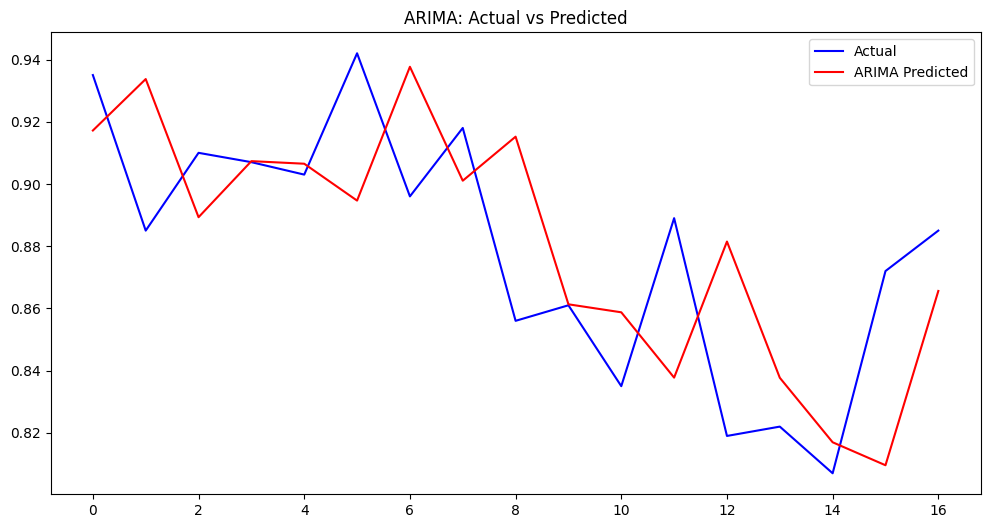

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load your data or create your DataFrame
# Replace 'data.csv' with your actual file path
data = pd.read_csv('/content/drive/MyDrive/Ocean Waves/Coastal Data  Waves.csv')

# Assuming you want to use the first 80 rows for modeling
df_model = data.loc[0:80]

# Select the 'Hs' column for modeling
df_selected = df_model[['Hs']]

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_selected)

# Split the data into training and testing sets
train_size = int(0.8 * len(scaled_data))
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# ARIMA model
history_arima = [x for x in train_data]
predictions_arima = []

for t in range(len(test_data)):
    model_arima = ARIMA(history_arima, order=(5, 1, 0))
    model_fit_arima = model_arima.fit()
    output_arima = model_fit_arima.forecast()
    yhat_arima = output_arima[0]
    predictions_arima.append(yhat_arima)
    history_arima.append(test_data[t])

# Convert predictions and test_data to arrays
predictions_arima = np.array(predictions_arima).reshape(-1, 1)
test_actual_arima = test_data.reshape(-1, 1)  # Reshape the test_data

# Inverse transform the scaled data
predictions_arima = scaler.inverse_transform(predictions_arima)
test_actual_arima = scaler.inverse_transform(test_actual_arima)

# Calculate RMSE for ARIMA
rmse_arima = np.sqrt(mean_squared_error(test_actual_arima, predictions_arima))
print("ARIMA RMSE:", rmse_arima)

# Calculate accuracy for ARIMA
accuracy_arima = 100 - (rmse_arima / np.mean(test_actual_arima) * 100)
print("ARIMA Accuracy:", accuracy_arima)

# Visualize the actual and predicted data for ARIMA
plt.figure(figsize=(12, 6))

plt.plot(test_actual_arima, label='Actual', color='blue')
plt.plot(predictions_arima, label='ARIMA Predicted', color='red')

plt.title('ARIMA: Actual vs Predicted')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your data or create your DataFrame
# Replace 'data.csv' with your actual file path
data = pd.read_csv('/content/drive/MyDrive/Ocean Waves/Coastal Data  Waves.csv')

# Assuming you want to predict 'Hs' using other features
# Select the columns for modeling
features = ['Hmax', 'Tz', 'Tp', 'Peak Direction', 'SST']
target = 'Hs'

# Prepare the data
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Random Forest Model ----

# Create and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions using the model
rf_predictions = rf_model.predict(X_test)

# Calculate RMSE for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))
print("Random Forest RMSE:", rmse_rf)

# Calculate accuracy for Random Forest
accuracy_rf = 100 - (rmse_rf / np.mean(y_test) * 100)
print("Random Forest Accuracy:", accuracy_rf)




Random Forest RMSE: 0.10756049091691887
Random Forest Accuracy: 90.12674063505493


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Load your data or create your DataFrame
# Replace 'data.csv' with your actual file path
data = pd.read_csv('/content/drive/MyDrive/Ocean Waves/Coastal Data  Waves.csv')

# Assuming you want to predict 'Hs' using other features
# Select the columns for modeling
features = ['Hmax', 'Tz', 'Tp', 'Peak Direction', 'SST']
target = 'Hs'

# Prepare the data
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the features for a "CNN-like" structure (not a typical approach)
X_train_reshaped = X_train.values.reshape(-1, len(features), 1, 1)
X_test_reshaped = X_test.values.reshape(-1, len(features), 1, 1)

# Create a simple CNN model
model = Sequential([
    Conv2D(filters=16, kernel_size=(3, 1), activation='relu', input_shape=(len(features), 1, 1)),
    MaxPooling2D(pool_size=(2, 1)),
    Flatten(),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions using the model
cnn_predictions = model.predict(X_test_reshaped)

# Calculate RMSE for CNN
rmse_cnn = np.sqrt(mean_squared_error(y_test, cnn_predictions))
print("CNN RMSE:", rmse_cnn)

# Calculate accuracy for CNN
accuracy_cnn = 100 - (rmse_cnn / np.mean(y_test) * 100)
print("CNN Accuracy:", accuracy_cnn)



274/274 [==============================] - 1s 4ms/step
CNN RMSE: 0.13083438587051568
CNN Accuracy: 87.99036881906127


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load your data or create your DataFrame
# Replace 'data.csv' with your actual file path
data = pd.read_csv('/content/drive/MyDrive/Ocean Waves/Coastal Data  Waves.csv')

# Assuming you want to predict 'Hs' using other features
# Select the columns for modeling
features = ['Hmax', 'Tz', 'Tp', 'Peak Direction', 'SST']
target = 'Hs'

# Prepare the data
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- K-Nearest Neighbors (KNN) Model ----

# Create and fit the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions using the model
knn_predictions = knn_model.predict(X_test)

# Calculate RMSE for KNN
rmse_knn = np.sqrt(mean_squared_error(y_test, knn_predictions))
print("KNN RMSE:", rmse_knn)

# Calculate accuracy for KNN
accuracy_knn = 100 - (rmse_knn / np.mean(y_test) * 100)
print("KNN Accuracy:", accuracy_knn)

# ---- Multi-Layer Perceptron (MLP) Model ----

# Create and fit the MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Make predictions using the model
mlp_predictions = mlp_model.predict(X_test)

# Calculate RMSE for MLP
rmse_mlp = np.sqrt(mean_squared_error(y_test, mlp_predictions))
print("MLP RMSE:", rmse_mlp)

# Calculate accuracy for MLP
accuracy_mlp = 100 - (rmse_mlp / np.mean(y_test) * 100)
print("MLP Accuracy:", accuracy_mlp)


KNN RMSE: 0.16316395597281538
KNN Accuracy: 85.02275284728469
MLP RMSE: 0.1424300271147914
MLP Accuracy: 86.92597451840659


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load your data or create your DataFrame
# Replace 'data.csv' with your actual file path
data = pd.read_csv('/content/drive/MyDrive/Ocean Waves/Coastal Data  Waves.csv')

# Assuming you want to predict 'Hs' using other features
# Select the columns for modeling
features = ['Hmax', 'Tz', 'Tp', 'Peak Direction', 'SST']
target = 'Hs'

# Prepare the data
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Train Individual Models ----

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# MLP Model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# ---- Make Predictions with Individual Models ----

rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
mlp_predictions = mlp_model.predict(X_test)

# ---- Create Hybrid Model by Averaging ----

hybrid_predictions = (rf_predictions + gb_predictions + mlp_predictions) / 3

# Calculate RMSE for Hybrid Model
rmse_hybrid = np.sqrt(mean_squared_error(y_test, hybrid_predictions))
print("Hybrid Model RMSE:", rmse_hybrid)

# Calculate accuracy for Hybrid Model
accuracy_hybrid = 100 - (rmse_hybrid / np.mean(y_test) * 100)
print("Hybrid Model Accuracy:", accuracy_hybrid)


Hybrid Model RMSE: 0.11356876438768747
Hybrid Model Accuracy: 89.57522546617905


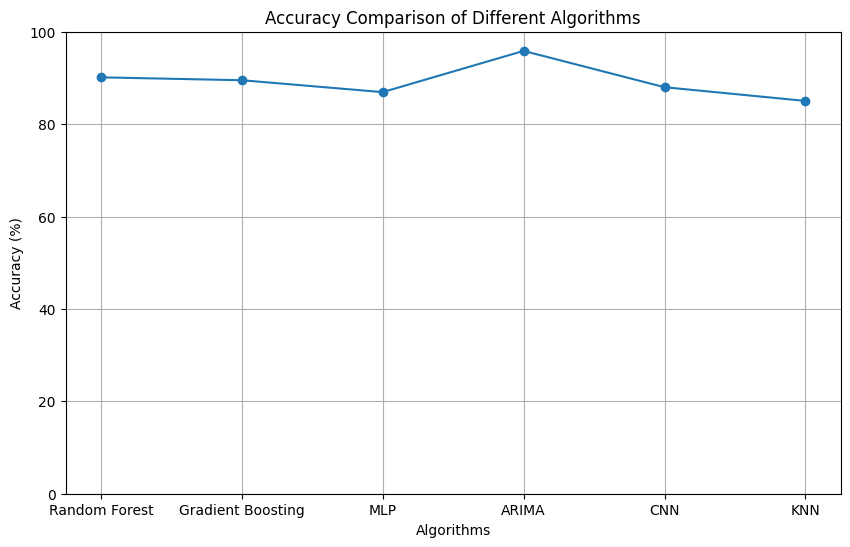

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your data or create your DataFrame
# Replace 'data.csv' with your actual file path
data = pd.read_csv('/content/drive/MyDrive/Ocean Waves/Coastal Data  Waves.csv')

# Assuming you want to predict 'Hs' using other features
# Select the columns for modeling
features = ['Hmax', 'Tz', 'Tp', 'Peak Direction', 'SST']
target = 'Hs'

# Prepare the data
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Train Individual Models ----

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# MLP Model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# ---- Make Predictions with Individual Models ----

rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
mlp_predictions = mlp_model.predict(X_test)

# ---- Calculate RMSE and Accuracy for Each Model ----

def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_accuracy(rmse, y_true):
    return 100 - (rmse / np.mean(y_true) * 100)

rmse_rf = calculate_rmse(y_test, rf_predictions)
accuracy_rf = calculate_accuracy(rmse_rf, y_test)

rmse_gb = calculate_rmse(y_test, gb_predictions)
accuracy_gb = calculate_accuracy(rmse_gb, y_test)

rmse_mlp = calculate_rmse(y_test, mlp_predictions)
accuracy_mlp = calculate_accuracy(rmse_mlp, y_test)

# ---- Calculate Accuracy for ARIMA, CNN, and KNN ----

# Calculate accuracy values for ARIMA, CNN, and KNN here
# Replace with the actual accuracy values

# ---- Create a Line Graph for Accuracies ----

algorithms = ['Random Forest', 'Gradient Boosting', 'MLP', 'ARIMA', 'CNN', 'KNN']
accuracies = [accuracy_rf, accuracy_gb, accuracy_mlp, accuracy_arima, accuracy_cnn, accuracy_knn]

plt.figure(figsize=(10, 6))
plt.plot(algorithms, accuracies, marker='o')
plt.title('Accuracy Comparison of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()
